<a href="https://colab.research.google.com/github/jrplatin/AlgorithmImplementations/blob/master/python_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from PIL import Image

def _average_pixel_vals(i,j,pixel_arr, num):
  sum_r = 0
  sum_g = 0
  sum_b = 0 

  half_num = num // 2
  num = num ** 2

  for row in range(i-half_num,i+1+half_num):
    for col in range(j-half_num,j+1+half_num):
      for channel in range(3):
        if channel == 0:
          sum_r += pixel_arr[row,col][0]
        elif channel == 1:
          sum_g += pixel_arr[row,col][1]
        elif channel == 2:
          sum_b += pixel_arr[row,col][2]
  return sum_r//num, sum_g//num, sum_b//num



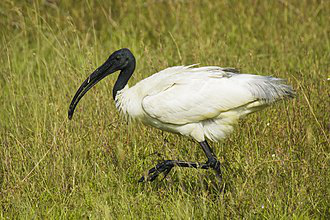

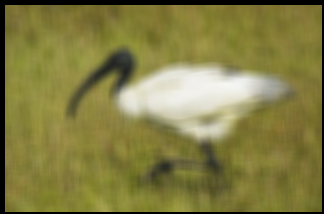

In [85]:
def blur(old_image_name, filter_size):
  old_image = Image.open(old_image_name)
  old_pixel_arr = old_image.load()

  img = Image.new(im.mode, (old_image.size[0]- 1 -filter_size//2, old_image.size[1]-1-filter_size//2))
  newPixelArr = img.load()

  for i in range(filter_size//2, img.size[0]-2):
      for j in range(filter_size//2, img.size[1]-2):
          newPixelArr[i,j] = _average_pixel_vals(i,j,old_pixel_arr, filter_size)
  display(old_image)
  display(img)


blur('ibis.jpg', 11)

In [132]:
def _apply_sobel(i,j,pixel_arr):
  sobel_x = [[-1,-2,-1],[0,0,0],[1,2,1]] 
  sobel_y = [[-1, 0,1],[-2,0,2],[-1,0,1]] 
  val_x = 0
  val_y = 0
  for row in range(i-1,i+2):
    for col in range(j-1,j+2):
      val_x += pixel_arr[row,col] * sobel_x[row-i][col-j]
      val_y += pixel_arr[row,col] * sobel_y[row-i][col-j]

  return int(math.sqrt(val_x**2 + val_y**2))

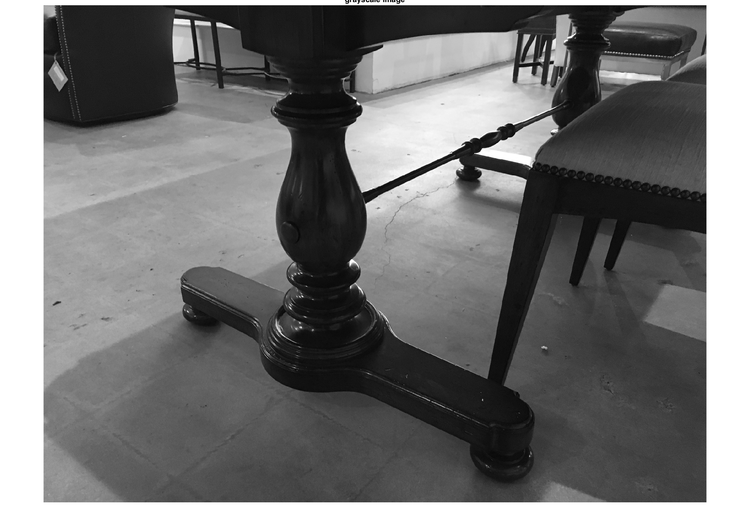

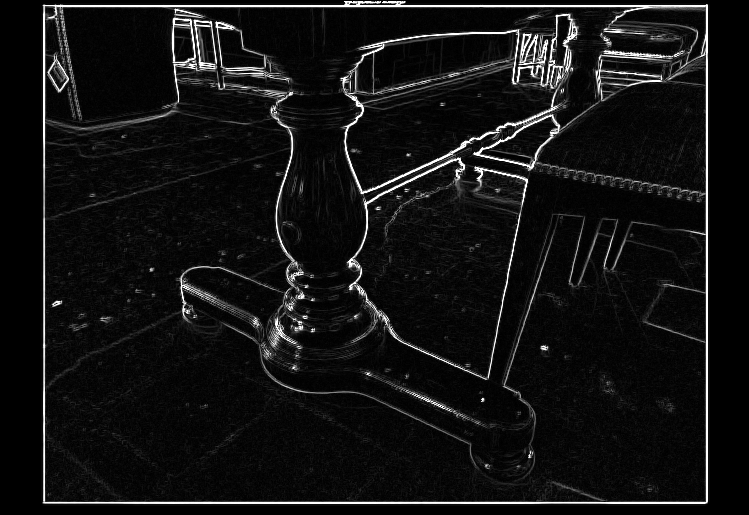

In [136]:
def detect_edges(image_name):
  old_image = Image.open(image_name).convert('L')
  old_pixel_arr = old_image.load()

  img = Image.new('L', (old_image.size[0]-1, old_image.size[1]-1))
  newPixelArr = img.load()

  for i in range(1, img.size[0]-1):
      for j in range(1, img.size[1]-1):
          newPixelArr[i,j] = _apply_sobel(i,j,old_pixel_arr)

  display(old_image)
  display(img)

detect_edges('table.png')

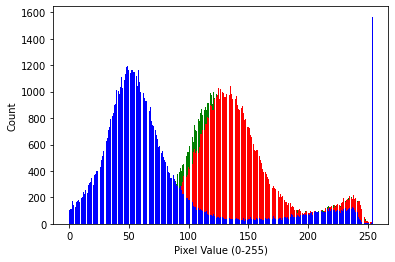

In [177]:
import matplotlib.pyplot as plt
import numpy as np
def make_histogram(image_name):
  image = Image.open(image_name)
  pixel_arr = image.load()

  red_vals = [0] * 255
  green_vals = [0] * 255
  blue_vals = [0] * 255

  for i in range(1, image.size[0]-1):
      for j in range(1, image.size[1]-1):
          for depth in range(3):
            val = pixel_arr[i,j]
            if depth == 0:
              red_vals[val[0]-1] += 1
            elif depth == 1:
              green_vals[val[1]-1] += 1
            elif depth == 2:
              blue_vals[val[2]-1] += 1

  %matplotlib inline
  plt.bar(range(255), green_vals,color='g')
  plt.bar(range(255), red_vals,color='r')
  plt.bar(range(255), blue_vals,color='b')

  plt.xlabel('Pixel Value (0-255)')
  plt.ylabel('Count')
  plt.show()

make_histogram('ibis.jpg')